In [137]:
import pandas
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [138]:
connection = sqlite3.connect('nearby_stars.db')
c = connection.cursor()

## Create power function

In [160]:
def power(base, exponent):
    return base**exponent
connection.create_function("power", 2, power)

## Add full age tables to database

In [3]:
age_tab = pandas.read_csv('gaspar13_agetable.csv')
age_tab.to_sql('gaspar13_agetable', connection)

In [15]:
age_tab = pandas.read_csv('ramirez13_agetable.csv')
age_tab.to_sql('ramirez13_agetable', connection)

In [88]:
age_tab = pandas.read_csv('ramirez12_agetable.csv')
age_tab.to_sql('ramirez12_agetable', connection)

In [22]:
age_tab = pandas.read_csv('isaacson10_agetable.csv')
age_tab.to_sql('isaacson10_agetable', connection)

In [61]:
for t in ['tsantaki13_agetable','casagrande11_agetable','chen01_agetable','david15_agetable','yee17_agetable']:
    age_tab = pandas.read_csv('{:s}.csv'.format(t))
    age_tab.to_sql(t, connection)

In [4]:
c.execute('PRAGMA table_info(gaspar13_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'recno', u'INTEGER', 0, None, 0),
 (2, u'S', u'TEXT', 0, None, 0),
 (3, u'Name', u'TEXT', 0, None, 0),
 (4, u'n_Name', u'TEXT', 0, None, 0),
 (5, u'SpT', u'TEXT', 0, None, 0),
 (6, u'Age', u'REAL', 0, None, 0),
 (7, u'q_Age', u'REAL', 0, None, 0),
 (8, u'r_Age', u'TEXT', 0, None, 0),
 (9, u'P24', u'INTEGER', 0, None, 0),
 (10, u'P70', u'REAL', 0, None, 0),
 (11, u'P100', u'REAL', 0, None, 0),
 (12, u'F24', u'REAL', 0, None, 0),
 (13, u'e_F24', u'REAL', 0, None, 0),
 (14, u'R24', u'REAL', 0, None, 0),
 (15, u'F70', u'REAL', 0, None, 0),
 (16, u'e_F70', u'REAL', 0, None, 0),
 (17, u'chi70', u'REAL', 0, None, 0),
 (18, u'F100', u'REAL', 0, None, 0),
 (19, u'f_F100', u'TEXT', 0, None, 0),
 (20, u'e_F100', u'REAL', 0, None, 0),
 (21, u'chi100', u'REAL', 0, None, 0),
 (22, u'FIR?', u'TEXT', 0, None, 0),
 (23, u'DD', u'INTEGER', 0, None, 0),
 (24, u'_RA', u'REAL', 0, None, 0),
 (25, u'_DE', u'REAL', 0, None, 0)]

In [16]:
c.execute('PRAGMA table_info(ramirez13_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'Name', u'TEXT', 0, None, 0),
 (2, u'Plx', u'REAL', 0, None, 0),
 (3, u'Age', u'REAL', 0, None, 0),
 (4, u'Age_lo1sig', u'REAL', 0, None, 0),
 (5, u'Age_hi1sig', u'REAL', 0, None, 0),
 (6, u'Age_lo2sig', u'REAL', 0, None, 0),
 (7, u'Age_hi2sig', u'REAL', 0, None, 0)]

In [89]:
c.execute('PRAGMA table_info(ramirez12_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'HIP', u'INTEGER', 0, None, 0),
 (2, u'Age', u'REAL', 0, None, 0),
 (3, u'Age_lolim', u'REAL', 0, None, 0),
 (4, u'Age_hilim', u'REAL', 0, None, 0)]

In [23]:
c.execute('PRAGMA table_info(isaacson10_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'recno', u'INTEGER', 0, None, 0),
 (2, u'Name', u'TEXT', 0, None, 0),
 (3, u'HIP', u'REAL', 0, None, 0),
 (4, u'B-V', u'REAL', 0, None, 0),
 (5, u'SHK', u'REAL', 0, None, 0),
 (6, u'Jitter', u'REAL', 0, None, 0),
 (7, u'logRHK', u'REAL', 0, None, 0),
 (8, u'dMag', u'REAL', 0, None, 0),
 (9, u'Prot', u'REAL', 0, None, 0),
 (10, u'Age', u'REAL', 0, None, 0),
 (11, u'Obs', u'TEXT', 0, None, 0),
 (12, u'SimbadName', u'TEXT', 0, None, 0),
 (13, u'_RA', u'REAL', 0, None, 0),
 (14, u'_DE', u'REAL', 0, None, 0)]

## Create subquery connecting star in Gaspar+2013 table to star in main simbad_FGK_nobinaries table

In [8]:
cmd = '''
SELECT LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))
FROM stars_FGK_nobinaries
    ---LEFT OUTER JOIN gaspar13_agetable
    ---ON LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0') LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

227
(u'22049',)
(u'10700',)
(u'20794',)
(u'190248',)
(u'219134',)
(u'2151',)
(u'157881',)
(u'217357',)
(u'115617',)
(u'1581',)
(u'192310',)
(u'32147',)
(u'23249',)
(u'103095',)
(u'203608',)
(u'151288',)
(u'122064',)
(u'103932',)
(u'43834',)
(None,)
(u'166620',)
(u'3651',)
(u'74576',)
(u'85512',)
(u'245409',)
(u'222237',)
(u'125072',)
(u'72673',)
(u'196877',)
(u'21531',)
(u'69830',)
(u'104304',)
(u'190007',)
(u'101581',)
(u'82106',)
(u'158633',)
(u'14412',)
(u'40307',)
(u'27274',)
(u'211970',)
(u'170657',)
(u'29697',)
(u'30495',)
(u'128165',)
(u'214749',)
(None,)
(u'10436',)
(u'22496',)
(u'145417',)
(u'154577',)
(u'95128',)
(u'281621',)
(u'23356',)
(u'22484',)
(u'5133',)
(u'120467',)
(u'110315',)
(u'150689',)
(u'234078',)
(u'173818',)
(u'72905',)
(None,)
(None,)
(u'52698',)
(u'196761',)
(u'197692',)
(u'136352',)
(None,)
(u'142709',)
(None,)
(u'205390',)
(u'84117',)
(u'144628',)
(u'218511',)
(u'40136',)
(u'105452',)
(None,)
(u'118926',)
(u'7570',)
(u'38858',)
(u'21197',)
(u'217014',)
(u'

In [9]:
cmd = '''
SELECT gaspar13_agetable.Name, RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0'))
FROM gaspar13_agetable
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

374
(u'HD 000038 ', u'38')
(u'HD 000739 ', u'739')
(u'HD 001237 ', u'1237')
(u'HD 001326 ', u'1326')
(u'HD 001404 ', u'1404')
(u'HD 001581 ', u'1581')
(u'HD 001835 ', u'1835')
(u'HD 002262 ', u'2262')
(u'HD 003196 ', u'3196')
(u'HD 004391 ', u'4391')
(u'HD 004628 ', u'4628')
(u'HD 004676 ', u'4676')
(u'HD 004747 ', u'4747')
(u'HD 004967 ', u'4967')
(u'HD 005448 ', u'5448')
(u'HD 007439 ', u'7439')
(u'HD 007570 ', u'7570')
(u'HD 007788 ', u'7788')
(u'HD 009540 ', u'9540')
(u'HD 010307 ', u'10307')
(u'HD 010361 ', u'10361')
(u'HD 010476 ', u'10476')
(u'HD 011171 ', u'11171')
(u'HD 011636 ', u'11636')
(u'HD 013161 ', u'13161')
(u'HD 013974 ', u'13974')
(u'HD 014055 ', u'14055')
(u'HD 015008 ', u'15008')
(u'HD 016160 ', u'16160')
(u'HD 016555 ', u'16555')
(u'HD 016673 ', u'16673')
(u'HD 016754 ', u'16754')
(u'HD 016765 ', u'16765')
(u'HD 016970 ', u'16970')
(u'HD 017051 ', u'17051')
(u'HD 017093 ', u'17093')
(u'HD 017206 ', u'17206')
(u'HD 018978 ', u'18978')
(u'HD 019107 ', u'19107')
(u'H

In [45]:
cmd = '''
SELECT gaspar13_agetable.Name, stars_FGK_nobinaries.HD, stars_FGK_nobinaries.HIP, gaspar13_agetable.Age
FROM gaspar13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
    OR (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HIP')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
WHERE gaspar13_agetable.Age is NOT NULL
    
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

87
(u'HD 001581 ', u'HD   1581', u'HIP   1599', 382.0)
(u'HD 007570 ', u'HD   7570', u'HIP   5862', 530.0)
(u'HD 017051 ', u'HD  17051', u'HIP  12653', 120.0)
(u'HD 020794 ', u'HD  20794', u'HIP  15510', 620.0)
(u'HD 021197 ', u'HD  21197', u'HIP  15919', 150.0)
(u'HD 022484 ', u'HD  22484', u'HIP  16852', 670.0)
(u'HD 022496 ', u'HD  22496', u'HIP  16711', 130.0)
(u'HD 023754 ', u'HD  23754', u'HIP  17651', 400.0)
(u'HD 036435 ', u'HD  36435', u'HIP  25544', 50.0)
(u'HD 039091 ', u'HD  39091', u'HIP  26394', 580.0)
(u'HD 071243 ', u'HD  71243', u'HIP  40702', 150.0)
(u'HD 084737 ', u'HD  84737', u'HIP  48113', 930.0)
(u'HD 101581 ', u'HD 101581', u'HIP  56998', 260.0)
(u'HD 105452 ', u'HD 105452', u'HIP  59199', 100.0)
(u'HD 109085 ', u'HD 109085', u'HIP  61174', 240.0)
(u'HD 110315 ', u'HD 110315', u'HIP  61901', 660.0)
(u'HD 115617 ', u'HD 115617', u'HIP  64924', 502.0)
(u'HD 120467 ', u'HD 120467', u'HIP  67487', 435.0)
(u'HD 136923 ', u'HD 136923', u'HIP  75277', 300.0)
(u'HD 1397

## Subquery for Ramirez+2013

In [61]:
cmd = '''
SELECT stars_FGK_nobinaries.hip, ramirez13_agetable.Name, 
stars_FGK_nobinaries.hd, ramirez13_agetable.Name, ramirez13_agetable.Plx, ramirez13_agetable.Age
FROM ramirez13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
    OR (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
WHERE ramirez13_agetable.Age IS NOT Null
ORDER BY Plx DESC
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

43
(u'HIP  16537', u'HIP 16537 ', u'HD  22049', u'HIP 16537 ', 310.94, 9.45)
(u'HIP   8102', u'HIP 8102  ', u'HD  10700', u'HIP 8102  ', 273.96, 13.16)
(u'HIP  15510', u'HIP 15510 ', u'HD  20794', u'HIP 15510 ', 165.47, 14.26)
(u'HIP  99240', u'HIP 99240 ', u'HD 190248', u'HIP 99240 ', 163.71, 10.65)
(u'HIP 114622', u'HIP 114622', u'HD 219134', u'HIP 114622', 152.76, 10.93)
(u'HIP   2021', u'HIP 2021  ', u'HD   2151', u'HIP 2021  ', 134.07, 6.09)
(u'HIP  64924', u'HIP 64924 ', u'HD 115617', u'HIP 64924 ', 116.89, 9.18)
(u'HIP   1599', u'HIP 1599  ', u'HD   1581', u'HIP 1599  ', 116.46, 6.31)
(u'HIP  99825', u'HIP 99825 ', u'HD 192310', u'HIP 99825 ', 112.22, 9.41)
(u'HIP  57939', u'HIP 57939 ', u'HD 103095', u'HIP 57939 ', 109.99, 13.88)
(u'HIP 105858', u'HIP 105858', u'HD 203608', u'HIP 105858', 107.97, 6.86)
(u'HIP  68184', u'HIP 68184 ', u'HD 122064', u'HIP 68184 ', 99.36, 13.89)
(u'HIP  29271', u'HIP 29271 ', u'HD  43834', u'HIP 29271 ', 98.06, 6.28)
(u'HIP   3093', u'HIP 3093  ', 

## Subquery for Ramirez+2012

In [92]:
cmd = '''
SELECT stars_FGK_nobinaries.hip, ramirez12_agetable.hip, ramirez12_agetable.Age
FROM ramirez12_agetable
    INNER JOIN stars_FGK_nobinaries
    ON ramirez12_agetable.hip LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP'))
WHERE ramirez12_agetable.Age IS NOT Null
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

86
(u'HIP   3206', 3206, 4.94)
(u'HIP  40843', 40843, 3.3)
(u'HIP  44897', 44897, 0.8)
(u'HIP  53721', 53721, 6.82)
(u'HIP  48113', 48113, 5.85)
(u'HIP  34017', 34017, 6.8)
(u'HIP  35136', 35136, 7.63)
(u'HIP  42438', 42438, 0.2)
(u'HIP  71395', 71395, 0.3)
(u'HIP  67275', 67275, 0.4)
(u'HIP  78459', 78459, 2.5)
(u'HIP  77760', 77760, 6.85)
(u'HIP  79248', 79248, 2.53)
(u'HIP  62207', 62207, 9.45)
(u'HIP  85235', 85235, 8.67)
(u'HIP  68184', 68184, 8.71)
(u'HIP 107350', 107350, 0.2)
(u'HIP  98505', 98505, 0.4)
(u'HIP 114622', 114622, 9.45)
(u'HIP 100017', 100017, 4.81)
(u'HIP 116763', 116763, 7.23)
(u'HIP    910', 910, 5.65)
(u'HIP   8102', 8102, 5.6)
(u'HIP   3909', 3909, 1.72)
(u'HIP   3093', 3093, 6.7)
(u'HIP 113357', 113357, 5.2)
(u'HIP  33817', 33817, 2.0)
(u'HIP  22263', 22263, 0.4)
(u'HIP  28103', 28103, 1.26)
(u'HIP  27435', 27435, 7.5)
(u'HIP  23311', 23311, 4.5)
(u'HIP  18859', 18859, 2.65)
(u'HIP  16852', 16852, 6.0)
(u'HIP  29525', 29525, 0.4)
(u'HIP  57507', 57507, 12.5)
(

## Subquery for Isaacson+2010

In [41]:
cmd = '''
SELECT RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HD'))), RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HIP'))), isaacson10_agetable.Age
FROM isaacson10_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.hip,'HIP')))
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

48
(u'25329', u'D 25329', 6.05)
(u'7924', u'D 7924', 4.65)
(u'69897', u'D 69897', 3.57)
(u'78366', u'D 78366', 0.86)
(u'95128', u'D 95128', 6.1)
(u'84737', u'D 84737', 8.19)
(u'65583', u'D 65583', 6.52)
(u'52711', u'D 52711', 6.4)
(u'55575', u'D 55575', 6.31)
(u'72905', u'D 72905', 0.13)
(u'62613', u'D 62613', 4.95)
(u'136923', u'D 136923', 1.96)
(u'143761', u'D 143761', 7.57)
(u'154345', u'D 154345', 3.74)
(u'142373', u'D 142373', 5.9)
(u'110897', u'D 110897', 6.08)
(u'158633', u'D 158633', 5.84)
(u'206860', u'D 206860', 0.28)
(u'190404', u'D 190404', 7.17)
(u'221354', u'D 221354', 7.84)
(u'216520', u'D 216520', 5.19)
(u'222335', u'D 222335', 3.6)
(u'220339', u'D 220339', 4.2)
(u'10700', u'D 10700', 6.15)
(u'4813', u'D 4813', 4.19)
(u'217014', u'D 217014', 7.62)
(u'30495', u'D 30495', 0.78)
(u'38858', u'D 38858', 5.72)
(u'41593', u'D 41593', 0.32)
(u'50692', u'D 50692', 6.53)
(u'115617', u'D 115617', 5.9)
(u'104304', u'D 104304', 7.35)
(u'115383', u'D 115383', 0.38)
(u'111395', u'D 11

## Subquery for Tsantaki+2013

In [67]:
cmd = '''
SELECT RTRIM(LTRIM(LTRIM(tsantaki13_agetable.Star,'HD'))), RTRIM(LTRIM(LTRIM(tsantaki13_agetable.Star,'HIP'))), 
tsantaki13_agetable.Age, tsantaki13_agetable.e_Age
FROM tsantaki13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(tsantaki13_agetable.Star,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(tsantaki13_agetable.Star,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.hip,'HIP')))
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

40
(u'55', u'D 55', 4.531000000000001, 3.824)
(u'1581', u'D 1581', 2.191, 1.052)
(u'2025', u'D 2025', 4.5569999999999995, 4.047)
(u'22049', u'D 22049', 3.5780000000000003, 3.322)
(u'23249', u'D 23249', 7.691, 0.37200000000000005)
(u'23356', u'D 23356', 4.371, 4.407)
(u'31560', u'D 31560', 4.376, 4.0680000000000005)
(u'35854', u'D 35854', 4.8069999999999995, 4.047)
(u'38858', u'D 38858', 2.01, 1.358)
(u'39091', u'D 39091', 0.7709999999999999, 0.491)
(u'40307', u'D 40307', 5.515, 3.946)
(u'52919', u'D 52919', 4.408, 4.01)
(u'69830', u'D 69830', 4.263999999999999, 4.178999999999999)
(u'72673', u'D 72673', 7.07, 3.759)
(u'76151', u'D 76151', 0.295, 0.21100000000000002)
(u'85512', u'D 85512', 4.5569999999999995, 4.125)
(u'101581', u'D 101581', 4.477, 4.032)
(u'102438', u'D 102438', 10.021, 1.4680000000000002)
(u'109200', u'D 109200', 7.689, 3.6319999999999997)
(u'115617', u'D 115617', 8.986, 1.575)
(u'125072', u'D 125072', 4.539, 4.141)
(u'130992', u'D 130992', 4.32, 4.216)
(u'142709', u'D 

## Subquery for Casagrande+2011

In [152]:
cmd = '''
SELECT t.HIP, t.Name, t.ageMP, t.age16P, t.age84P
FROM casagrande11_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON t.HIP LIKE LTRIM(LTRIM(s.hip,'HIP')) OR
    (RTRIM(LTRIM(LTRIM(t.Name,'HD'))) LIKE LTRIM(LTRIM(s.hip,'HD'))) OR
    REPLACE(LTRIM(t.Name,'BD'),' ','') LIKE REPLACE(LTRIM(s.main_id,'BD'),' ','')
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

123
(18915, u'HD 25329', 7.41, 3.9, 11.39)
(3206, u'HD 3765', 6.57, 2.1, 11.3)
(19422, u'HD 25665', 7.63, 2.69, 11.98)
(8070, u'HD 10436', 7.88, 3.38, 11.94)
(18774, u'HD 24451', 7.74, 3.08, 11.97)
(40843, u'HD 69897', 2.35, 1.48, 3.09)
(44897, u'HD 78366', 2.1, 0.68, 3.85)
(53721, u'HD 95128', 6.25, 4.98, 7.51)
(47690, u'HD 84035', 6.72, 2.07, 11.52)
(48113, u'HD 84737', 5.1, 4.39, 6.36)
(39157, u'HD 65583', 6.9, 2.25, 11.59)
(34017, u'HD 52711', 4.7, 2.44, 6.85)
(35136, u'HD 55575', 5.54, 3.61, 7.35)
(32769, u'HD 48948', 6.72, 2.05, 11.56)
(42438, u'HD 72905', 2.5, 0.68, 5.44)
(38784, u'HD 62613', 4.68, 1.4, 9.17)
(72312, u'HD 130307', 5.56, 1.49, 10.63)
(67275, u'HD 120136', 1.78, 0.65, 2.93)
(78459, u'HD 143761', 7.82, 4.2, 11.1)
(83389, u'HD 154345', 5.39, 1.66, 10.22)
(77760, u'HD 142373', 7.62, 7.0, 8.27)
(62207, u'HD 110897', 5.1, 1.66, 9.34)
(71181, u'HD 128165', 6.84, 2.17, 11.61)
(85235, u'HD 158633', 4.19, 1.03, 9.03)
(105038, u'HD 202575', 7.63, 2.93, 11.91)
(107350, u'HD 

## Subquery for Chen+2001

In [154]:
cmd = '''
SELECT t.Name, s.main_id, RTRIM(LTRIM(LTRIM(t.Name,'HD'))), RTRIM(LTRIM(LTRIM(t.Name,'HIP'))), REPLACE(LTRIM(t.Name,'BD'),' ',''),
t.Age, t.u_Age
FROM chen01_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON 
    (RTRIM(LTRIM(LTRIM(t.Name,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.Name,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP'))) OR
    REPLACE(LTRIM(t.Name,'BD'),' ','') LIKE REPLACE(LTRIM(s.main_id,'BD'),' ','') OR
    REPLACE(LTRIM(t.Name,'CD'),' ','') LIKE REPLACE(LTRIM(s.main_id,'CD'),' ','')
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

13
(u'HD   693', u'*   6 Cet', u'693', u'D   693', u'HD693', 4.8, u' ')
(u'HD  4813', u'* phi02 Cet', u'4813', u'D  4813', u'HD4813', 3.8, u' ')
(u'HD 22484', u'*  10 Tau', u'22484', u'D 22484', u'HD22484', 6.3, u' ')
(u'HD 25457', u'HD  25457', u'25457', u'D 25457', u'HD25457', 3.5, u' ')
(u'HD 55575', u'HD  55575', u'55575', u'D 55575', u'HD55575', 10.6, u' ')
(u'HD 69897', u'* chi Cnc', u'69897', u'D 69897', u'HD69897', 3.3, u' ')
(u'HD 95128', u'*  47 UMa', u'95128', u'D 95128', u'HD95128', 12.1, u' ')
(u'HD110897', u'*  10 CVn', u'110897', u'D110897', u'HD110897', 14.5, u' ')
(u'HD142373', u'* chi Her', u'142373', u'D142373', u'HD142373', 9.7, u' ')
(u'HD143761', u'* rho CrB', u'143761', u'D143761', u'HD143761', 11.2, u' ')
(u'HD157347', u'HD 157347', u'157347', u'D157347', u'HD157347', 7.7, u' ')
(u'HD203608', u'* gam Pav', u'203608', u'D203608', u'HD203608', 7.2, u' ')
(u'HD206860', u'HD 206860', u'206860', u'D206860', u'HD206860', 9.9, u' ')


## Subquery for David+2015

In [158]:
cmd = '''
SELECT t.HIP, s.main_id, t.Ageavg/1e3, t.Agemed/1e3, t.Age68lo/1e3, t.Age68up/1e3
FROM david15_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON t.HIP LIKE LTRIM(LTRIM(s.hip,'HIP'))
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

11
(28103, u'* eta Lep', 1.283, 1.394, 1.155, 1.779)
(32362, u'* ksi Gem', 1.391, 1.698, 0.841, 4.34)
(59199, u'* alf Crv', 0.558, 0.729, 0.398, 1.54)
(61174, u'* eta Crv', 0.814, 1.012, 0.537, 2.243)
(86736, u'*  58 Oph', 2.652, 2.558, 1.717, 3.236)
(92043, u'* 110 Her', 3.185, 3.107, 2.234, 4.418)
(17651, u'* tau06 Eri', 1.694, 2.0, 1.223, 4.097)
(50954, u'* I Car', 0.977, 1.259, 0.75, 2.113)
(40702, u'* alf Cha', 1.801, 1.939, 1.417, 2.567)
(76829, u'* g Lup', 1.902, 1.995, 1.496, 2.441)
(102485, u'* psi Cap', 1.907, 1.866, 1.403, 2.38)


## Subquery for Yee+2017

Age uncertainties really large from this source, and ages exceed age of the universe... hmm.

In [174]:
cmd = '''
SELECT t.Name, POWER(10,t.logAge-9), POWER(10,logAge-t.e_logAge-9), POWER(10,logAge+t.e_logAge-9)
FROM yee17_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON (RTRIM(LTRIM(LTRIM(t.Name,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.Name,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP'))) OR 
    (RTRIM(LTRIM(LTRIM(t.Name,'GL'))) LIKE LTRIM(LTRIM(s.gj,'GJ'))) 
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

36
(u'HD 128311', 8.91250938133744, 2.8840315031265997, 27.542287033381633)
(u'HD 130307', 5.4954087385762485, 1.698243652461746, 17.78279410038923)
(u'HD 170657', 6.456542290346563, 2.041737944669532, 20.417379446695318)
(u'HD 189733', 7.762471166286928, 2.5118864315095824, 23.988329190194946)
(u'HD 202575', 9.120108393559116, 3.090295432513592, 26.91534803926925)
(u'HD 220339', 6.16595001861481, 1.8620871366628655, 20.417379446695232)
(u'HD 31560', 10.0, 3.5481338923357604, 28.18382931264449)
(u'HD 42807', 2.1379620895022327, 0.9772372209558111, 4.677351412871981)
(u'HD 5133', 5.623413251903491, 1.698243652461746, 18.620871366628656)
(u'HD 84737', 6.309573444801943, 4.7863009232264, 8.317637711026709)
(u'HD 87883', 8.317637711026709, 2.754228703338163, 25.11886431509582)
(u'HIP 105341', 4.3651583224016655, 1.3182567385564101, 14.45439770745928)
(u'HIP 15095', 4.073802778041122, 1.2302687708123812, 13.489628825916505)
(u'HIP 40375', 3.5481338923357604, 1.0715193052376093, 11.748975549

## Add new ages to table

In [139]:
cmd = '''
SELECT * FROM ages WHERE bibcode = '2013ApJ...764...78R'
'''
c.execute(cmd)
rows=c.fetchall()
print len(rows)

0


In [63]:
cmd = '''
DELETE FROM ages
WHERE bibcode = '2013ApJ...764...78R'
'''
c.execute(cmd)

In [140]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT gaspar13_agetable.Age/100, '2013ApJ...768...25G', stars_FGK_nobinaries.sid
FROM gaspar13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
    OR (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HIP')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
WHERE gaspar13_agetable.Age is NOT NULL
'''
c.execute(cmd)

In [141]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
SELECT ramirez13_agetable.Age, ramirez13_agetable.Age_lo1sig, ramirez13_agetable.Age_hi1sig,  
'2013ApJ...764...78R', stars_FGK_nobinaries.sid
FROM ramirez13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
    OR (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
WHERE ramirez13_agetable.Age is NOT NULL
'''
c.execute(cmd)

In [143]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
SELECT ramirez12_agetable.Age, ramirez12_agetable.Age_lolim, ramirez12_agetable.Age_hilim,
'2012ApJ...756...46R', stars_FGK_nobinaries.sid
FROM ramirez12_agetable
    INNER JOIN stars_FGK_nobinaries
    ON ramirez12_agetable.hip LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP'))
WHERE ramirez12_agetable.Age IS NOT Null
'''
c.execute(cmd)

In [144]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT isaacson10_agetable.Age, '2010ApJ...725..875I', stars_FGK_nobinaries.sid
FROM isaacson10_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.hip,'HIP')))
'''
c.execute(cmd)

In [145]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
SELECT t.Age, t.Age - t.e_Age, t.Age + t.e_Age, '2013A&A...555A.150T', s.sid
FROM tsantaki13_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON (RTRIM(LTRIM(LTRIM(t.Star,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.Star,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP')))
'''
c.execute(cmd)

In [155]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT t.Age, '', s.sid
FROM chen01_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON 
    (RTRIM(LTRIM(LTRIM(t.Name,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.Name,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP'))) OR
    REPLACE(LTRIM(t.Name,'BD'),' ','') LIKE REPLACE(LTRIM(s.main_id,'BD'),' ','') OR
    REPLACE(LTRIM(t.Name,'CD'),' ','') LIKE REPLACE(LTRIM(s.main_id,'CD'),' ','')
'''
c.execute(cmd)

In [159]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
SELECT t.Agemed/1e3, t.Age68lo/1e3, t.Age68up/1e3, '2015ApJ...804..146D', s.sid
FROM david15_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON t.HIP LIKE LTRIM(LTRIM(s.hip,'HIP'))
'''
c.execute(cmd)

In [ ]:
#cmd = '''
#INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
#SELECT t.Name, t.logAge, t.e_logAge
#FROM yee17_agetable as t
#    INNER JOIN stars_FGK_nobinaries as s
#    ON (RTRIM(LTRIM(LTRIM(t.Name,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
#    (RTRIM(LTRIM(LTRIM(t.Name,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP'))) OR 
#    (RTRIM(LTRIM(LTRIM(t.Name,'GL'))) LIKE LTRIM(LTRIM(s.gj,'GJ'))) 
#'''
#c.execute(cmd)

In [176]:
connection.commit()

In [177]:
c.close()

## Check table

In [178]:
connection = sqlite3.connect('nearby_stars.db')
c = connection.cursor()

Number of stars with at least one age measurement:

In [179]:
cmd = '''
SELECT COUNT (DISTINCT stars_FGK_nobinaries.sid)
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
'''
c.execute(cmd)
rows = c.fetchall()
for row in rows:
    print row

(158,)


Number of stars with more than one age measurement:

In [180]:
cmd = '''
SELECT COUNT(*)
FROM (SELECT COUNT(*)
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*) > 1)
'''
c.execute(cmd)
rows = c.fetchall()
for row in rows:
    print row

(122,)


Range of ages for stars with multiple measurements.

In [181]:
cmd = '''
SELECT stars_FGK_nobinaries.sid, stars_FGK_nobinaries.main_id, MIN(ages.age), MAX(ages.age), 
100*(MAX(ages.age) - MIN(ages.age))/AVG(ages.age)
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*) > 1
ORDER BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

122
(0, u'* eps Eri', 0.4, 9.45, 262.47099767981433)
(1, u'* tau Cet', 5.6, 13.16, 102.60586319218241)
(2, u'* e Eri', 5.72, 14.38, 92.79897128161166)
(3, u'* del Pav', 6.9, 10.65, 43.81148211323224)
(4, u'HD 219134', 6.51, 10.93, 49.312011900334696)
(5, u'* bet Hyi', 5.47, 6.15, 11.518915866741963)
(8, u'*  61 Vir', 4.2, 9.18, 77.04548468372896)
(9, u'* zet Tuc', 2.1, 7.16, 125.96987676859882)
(10, u'HD 192310', 4.667, 9.41, 67.61707890797634)
(11, u'HD  32147', 4.5, 5.5, 19.5822454308094)
(13, u'HD 103095', 0.53, 13.88, 187.13204373423048)
(14, u'* gam Pav', 0.57, 7.2, 135.97210828547992)
(16, u'HD 122064', 5.5, 13.89, 89.5729537366548)
(17, u'HD 103932', 2.5, 6.66, 90.8296943231441)
(18, u'* alf Men', 4.9, 6.28, 25.794392523364486)
(20, u'HD 166620', 5.4, 7.1, 28.215767634854764)
(21, u'*  54 Psc', 1.96, 7.7, 97.4202308214528)
(22, u'HD  74576', 2.96, 7.54, 81.1577082102776)
(23, u'HD  85512', 4.5569999999999995, 6.68, 37.785885912610134)
(25, u'HD 222237', 3.5, 13.14, 136.244788354

Stars whose only age measurement is **only** from a given bibcode:

In [182]:
cmd = '''
SELECT stars_FGK_nobinaries.sid, stars_FGK_nobinaries.main_id, COUNT(*), ages.bibcode, ages.age
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*)= 1 AND ages.bibcode = '2013ApJ...764...78R'
ORDER BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

0


Which stars have no age measurements?

In [183]:
cmd = '''
SELECT s.sid, s.main_id, s.hd, s.hip, 1/(s.plx_value*1e-3) as d
FROM  stars_FGK_nobinaries as s
LEFT OUTER JOIN ages as a ON s.sid = a.sid
WHERE a.Age IS Null
ORDER BY d
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

69
(19, u'BD+36  2393', None, u'HIP  66459', 10.958675928939561)
(24, u'V* V2689 Ori', u'HD 245409', u'HIP  26335', 11.436845169133784)
(41, u'HD  29697', u'HD  29697', u'HIP  21818', 13.238107215430336)
(45, u'BD+62   780', None, u'HIP  27188', 13.513878753479823)
(51, u'HD 281621', u'HD 281621', u'HIP  19337', 13.925055352095024)
(59, u'HD 173818', u'HD 173818', u'HIP  92200', 14.256630758965997)
(61, u'BD-08  2582', None, u'HIP  44722', 14.51640062943113)
(62, u'BD+30  2512', None, u'HIP  70218', 14.522050281146894)
(67, u'BD+40    45', None, u'HIP   1368', 14.698295438677976)
(69, u'BD+33   529', None, u'HIP  13375', 14.763089324071954)
(76, u'BD+63   137', None, u'HIP   5247', 15.067706740237256)
(77, u'HD 118926', u'HD 118926', u'HIP  66675', 15.076839110526802)
(86, u'HD 152705', u'HD 152705', None, 15.688464742528758)
(89, u'BD-07   699', None, u'HIP  18280', 15.69713323255774)
(91, u'HD 203040', u'HD 203040', u'HIP 105341', 15.785494078071897)
(92, u'BD+41  2695', None, u'HIP 

In [184]:
cmd = '''
SELECT stars_FGK_nobinaries.sid, stars_FGK_nobinaries.main_id, COUNT(*), ages.bibcode, ages.age
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*)= 1 AND ages.bibcode = '2012ApJ...756...46R'
ORDER BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

2
(104, u'HD 128311', 1, u'2012ApJ...756...46R', 0.3)
(222, u'HD 110810', 1, u'2012ApJ...756...46R', 10.16)


What percentage of stars lack age measurements and what are the parallaxes of the two stellar samples?

In [229]:
cmd = '''
SELECT stars_FGK_nobinaries.plx_value, stars_FGK_nobinaries.sp_type
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
plx_yesage = c.fetchall()

cmd = '''
SELECT stars_FGK_nobinaries.plx_value, stars_FGK_nobinaries.sp_type
FROM  stars_FGK_nobinaries
LEFT OUTER JOIN ages ON stars_FGK_nobinaries.sid = ages.sid
WHERE ages.age IS Null
GROUP BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
plx_noage = c.fetchall()

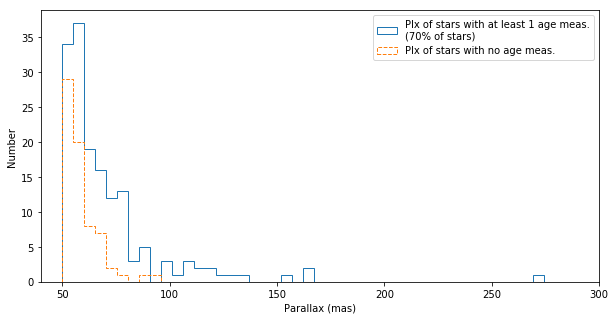

In [312]:
plt.figure(figsize=(10,5))
plt.hist(zip(*plx_yesage)[0],histtype='step',
         label='Plx of stars with at least 1 age meas.\n({:1.0f}% of stars)'.format(100*float(len(plx_yesage))/(len(plx_yesage) + len(plx_noage))),
         bins = np.linspace(50,300,50))
plt.hist(zip(*plx_noage)[0],histtype='step',label='Plx of stars with no age meas.',
         bins = np.linspace(50,300,50),linestyle='dashed')
plt.legend()
plt.xlim(40,300)
plt.xlabel('Parallax (mas)')
plt.ylabel('Number')
#axdist = plt.gca().twiny()
#axdist.hist(1/(np.array(plx_noage)[:,0]*1e-3),histtype='step',
#           bins = np.linspace(50,300,25),linestyle='dashed')
#axdist.set_xlim(1/40e-3,1/300e-3)
#axdist.set_xlabel('Distance (pc)')
plt.show()

Difference is more clear in a CDF in terms of distance:

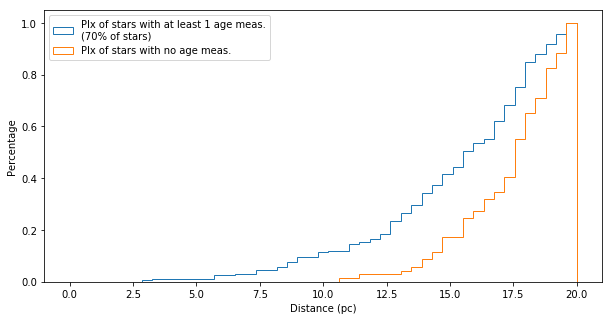

In [320]:
plt.figure(figsize=(10,5))
plt.hist(1e3/np.array(zip(*plx_yesage)[0]),histtype='step',
         label='Plx of stars with at least 1 age meas.\n({:1.0f}% of stars)'.format(100*float(len(plx_yesage))/(len(plx_yesage) + len(plx_noage))),
         bins = np.linspace(0,20,50),cumulative=1,normed=True)
plt.hist(1e3/np.array(zip(*plx_noage)[0]),histtype='step',label='Plx of stars with no age meas.',
         bins = np.linspace(0,20,50),cumulative=1,normed=True)
plt.legend(loc='upper left')
plt.ylabel('Percentage')
plt.xlabel('Distance (pc)')
plt.show()

Spectral types of stars with and without age measurements.

In [330]:
percen_FGK_yesage = np.zeros(3)

tot_stars = float(len(plx_yesage) + len(plx_noage))

for i, stype in enumerate(['F','G','K']):
    
    tot_stars = float(len(np.where(np.char.find(np.array(zip(*plx_yesage)[1]),stype) == 0)[0]) +\
                     len(np.where(np.char.find(np.array(zip(*plx_noage)[1]),stype) == 0)[0]))
    
    percen_FGK_yesage[i] = len(np.where(np.char.find(np.array(zip(*plx_yesage)[1]),stype) == 0)[0]) / tot_stars
    
print percen_FGK_yesage*100.

[ 100.           97.77777778   56.12903226]


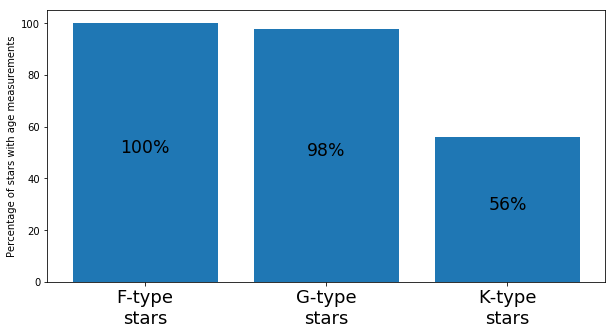

In [347]:
plt.figure(figsize=(10,5))
plt.bar(range(3),height=percen_FGK_yesage*100)
plt.ylabel('Percentage of stars with age measurements')
plt.xticks(range(3),['F-type\nstars','G-type\nstars','K-type\nstars'],fontsize='18')
for i, stype in enumerate(['F','G','K']):
    plt.text(i,percen_FGK_yesage[i]*100./2.,'{:1.0f}%'.format(percen_FGK_yesage[i]*100.),
            horizontalalignment='center',fontsize='xx-large')
plt.show()

In [348]:
c.close()